<h1 style="font-size:36px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Project:</span> Predicting Bike Rentals</h1>
<hr>

## Project Context :

Bike Share is a network of shared bicycles available for short-term use. Many cities in the world provides bike-sharing program for the citizens and visitors where they can rent a bike by the hour or day, ride it in the city and return it later. It helps to reduce traffic congestion in the city and thus improving air quality.It is also useful for promoting local tourism and hence local economy.<br>

Like many world cities, Washington DC too has such bike-sharing program for the citizens and has multiple stations for renting and return and detailed data is collected on to find out how many peple are using the program on timely basis.<br>

In this project, we will use the data collected in Washington DC and try to reach the goal using Machine Learning algorithms.


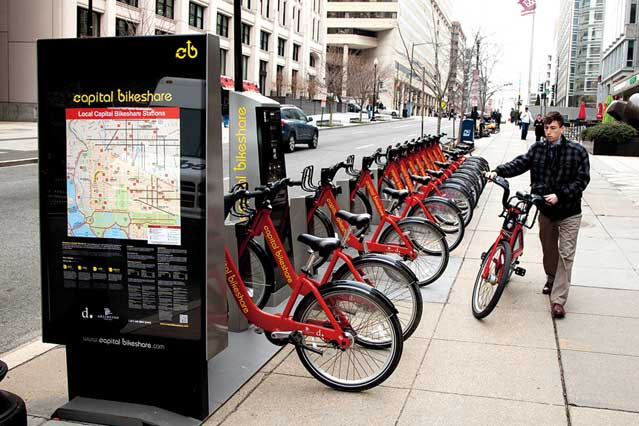

## Goal:

The objective of this project is to **predict the total number of bikes people rented** in a given hour in Washington DC

### 1. Collecting Data:

In [11]:
from __future__ import print_function
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']=(10,7)

**Data Source :** http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

In [3]:

bike_rentals = pd.read_csv('hour.csv')

### 2. Exploratory Data Analysis:

In [4]:
bike_rentals.shape

(17379, 17)

The dataset is having 17379 rows and 18 columns.

In [5]:
bike_rentals.get_dtype_counts()

float64     4
int64      12
object      1
dtype: int64

Let's find out which feature is categorical in the dataset

In [6]:
# Filtering out the categorical column names    
for i in bike_rentals.dtypes[ bike_rentals.dtypes == 'object'].index:
    print(i)

dteday


In [7]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
bike_rentals.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
bike_rentals.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Let's see the distribution of the target variable i.e 'cnt' column. A histogram will allow us to see the distribution of any field.

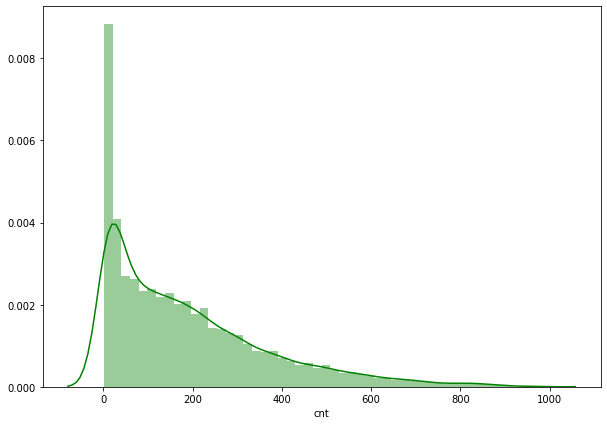

In [13]:
# Histogram of Target Variable
sns.distplot(bike_rentals['cnt'],color='g')

Now, let's find out the correlation of all the features with the target variable 'cnt'. This will help us to figure out the features which has strong and weak relation with the target variable.

In [14]:
bike_rentals.corr()['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

### 3. Data Cleaning:

In [15]:
bike_rentals = bike_rentals.drop_duplicates()

In [16]:
bike_rentals.shape

(17379, 17)

So, the shape remains same, means there is **no duplicate data in our dataset.**

In [18]:

bike_rentals.select_dtypes(include = ['object']).isnull().sum()

dteday    0
dtype: int64

In [19]:
bike_rentals.select_dtypes(exclude = ['object']).isnull().sum()

instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

We can see there is **no missing values** in Categorical as well in numerical features. 

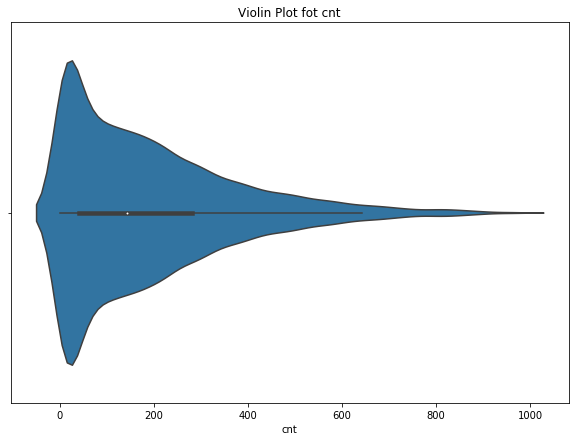

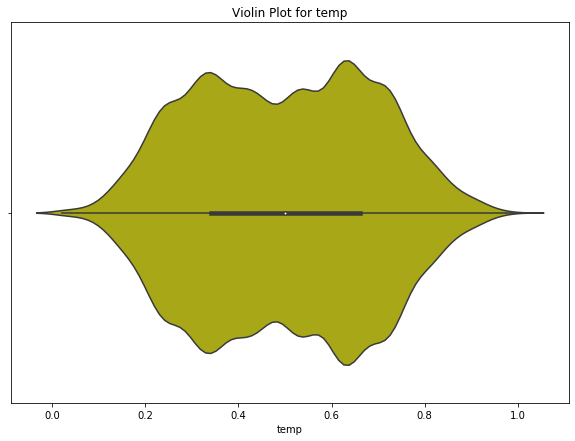

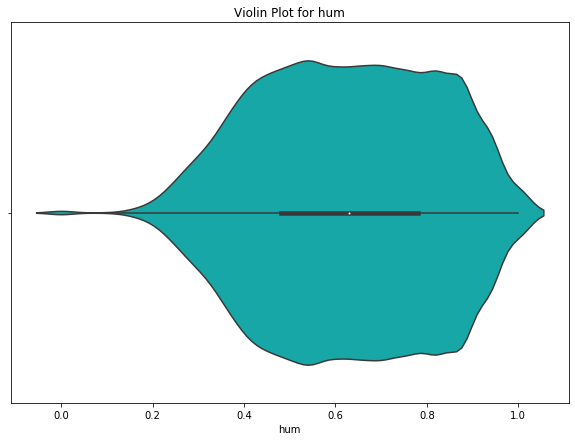

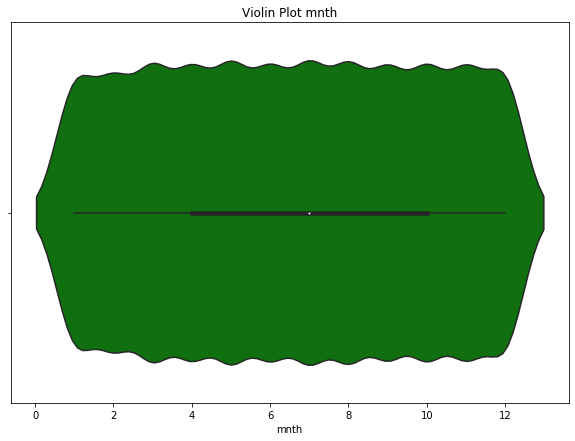

In [21]:
sns.violinplot(bike_rentals['cnt'])
plt.title('Violin Plot fot cnt')
plt.show()

sns.violinplot(bike_rentals['temp'],color='y')
plt.title('Violin Plot for temp')
plt.show()

sns.violinplot(bike_rentals['hum'],color='c')
plt.title('Violin Plot for hum')
plt.show()

sns.violinplot(bike_rentals['mnth'],color='g')
plt.title('Violin Plot mnth')
plt.show()

It looks like there is **no apparent outliers** that can affect the performance of our models.

### 4. Feature Engineering:

In [151]:
bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,1/1/2011,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,1/1/2011,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,1/1/2011,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,1/1/2011,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,1/1/2011,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


The hour column contains the hours during which bikes are rented.

We will create an indicator variable for hour which will bundle similar times together, enabling our model to make better decision.

In [22]:
def assign_label(col):
    if col in range(6,12):
        col = 1
    elif col in range(12,18):
        col = 2
    elif col in range(18,24):
        col = 3
    else:
        col = 4
    return col

In [23]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [24]:
cols = ['temp','atemp','yr','season','mnth','weathersit','hum','windspeed','workingday','weekday','holiday','time_label']

### 5. Model Training:

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
# Creating Target and Feature variable
y = bike_rentals['cnt']
X = bike_rentals.drop('cnt',axis=1)


In [27]:
# Splitting the data for Training and Testing
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)


Since, we are looking for count of the bikes rented, we will be predicting a continous target. So, we will be using Regression algorithms. Let's import the regression metrics to evaluate the model's performance.

In [28]:
# Importing regression metrics
from sklearn.metrics import r2_score, mean_squared_error


###### *Model Selection*

We can see from the correlation that many of the features are highly correlated with the target variable. Let's create a linear regression model and find out its performance on test dataset.

In [29]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train[cols],y_train)
y_pred = linreg.predict(X_test[cols])

r2_value = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("R-squared value for Linear Regression :",r2_value)
print("RMSE: ",rmse)

R-squared value for Linear Regression : 0.3981969470120311
RMSE:  138.04470731034746


We can see the R-squared value is not very high. Let's create a Decision Tree model and check if a Decision Tree can improve the score on test data.

In [30]:
# Creating Decision Tree model
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()


In [31]:
dtr.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [32]:
# Creating hyperparameter grid
dtr_hyperparameter = {'min_samples_leaf' : [1,3,5,7,8,10,15]}
                     

In [33]:
# Using Cross-validation for creating the model
model = GridSearchCV(dtr, dtr_hyperparameter, cv = 10, n_jobs = -1)
model.fit(X_train[cols], y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [1, 3, 5, 7, 8, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
model.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=15,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
# Evaluating Decision tree performance
y_pred_dt = model.predict(X_test[cols])

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

r2_val_dt = r2_score(y_test, y_pred_dt)

print("RMSE of Decision Tree :", rmse_dt)
print("R- squared value of Decision Tree :", r2_val_dt)


RMSE of Decision Tree : 113.23589763591568
R- squared value of Decision Tree : 0.5950670472216779


We can see that the decision tree model has performed better than the linear regression model. The R-squared value has improved and root-mean-squared error has come down.<br>

Let's create a Random Forest model and see if the model performs better than the Decision Tree. 

In [36]:
# Initiating RandomForest object
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [37]:
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [38]:
# Creating Random Forest hyperparameter
rf_hyperparameter = {'min_samples_leaf' : [2,3,4,5,6,7,8,9],
                     'n_estimators' : [5,10,15,20,25]}

In [39]:
# Using Cross-validation for creating the model
rf_model = GridSearchCV(rf, rf_hyperparameter, cv=10, n_jobs = -1)
rf_model.fit(X_train[cols], y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9], 'n_estimators': [5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
rf_model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
# Evaluating RandomForest performance
y_pred_rf = rf_model.predict(X_test[cols])

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)

print("RMSE of Random Forest :",rmse_rf)
print("R-squared value of Random Forest :",r2_rf)

RMSE of Random Forest : 107.68315293950728
R-squared value of Random Forest : 0.6338067014577793


### Conclusion

We selected Root-mean-squared-error and R-square as our metric for the regression models.


We have created 3 different regression model(Linear Regression, Decision Tree Regression and Random Forest Regression) to predict the count of bike rentals and by comparing, out of these 3 models **Random Forest performed the best** as its r-squared value was highest and it had the lowest error. 